In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import pickle

In [3]:
#problem statement:
#To predict the selling price of the used cars

In [4]:
#data gathring
df=pd.read_csv('car data.csv')
df.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [7]:
df.value_counts()

Car_Name           Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  Owner
fortuner           2015  23.00          30.61          40000       Diesel     Dealer       Automatic     0        2
ertiga             2016  7.75           10.79          43000       Diesel     Dealer       Manual        0        2
800                2003  0.35           2.28           127000      Petrol     Individual   Manual        0        1
ertiga             2015  6.10           7.71           26000       Petrol     Dealer       Manual        0        1
etios g            2014  4.75           6.76           40000       Petrol     Dealer       Manual        0        1
                                                                                                                 ..
Yamaha FZ S V 2.0  2015  0.55           0.84           58000       Petrol     Individual   Manual        0        1
                         0.48           0.84           23000       Petrol    

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
df['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [10]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [11]:
final_dataset=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission',
                  'Owner']]

In [12]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [13]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [14]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [15]:
df.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

In [16]:
final_dataset.head()

Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0  2014           3.35           5.59       27000    Petrol      Dealer   
1  2013           4.75           9.54       43000    Diesel      Dealer   
2  2017           7.25           9.85        6900    Petrol      Dealer   
3  2011           2.85           4.15        5200    Petrol      Dealer   
4  2014           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  
0       Manual      0  
1       Manual      0  
2       Manual      0  
3       Manual      0  
4       Manual      0

In [17]:
final_dataset['current_year']=2020

In [18]:
final_dataset.head()

Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0  2014           3.35           5.59       27000    Petrol      Dealer   
1  2013           4.75           9.54       43000    Diesel      Dealer   
2  2017           7.25           9.85        6900    Petrol      Dealer   
3  2011           2.85           4.15        5200    Petrol      Dealer   
4  2014           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  current_year  
0       Manual      0          2020  
1       Manual      0          2020  
2       Manual      0          2020  
3       Manual      0          2020  
4       Manual      0          2020

In [19]:
final_dataset['no_year']=final_dataset['current_year']-final_dataset['Year']

In [20]:
final_dataset.head()

Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0  2014           3.35           5.59       27000    Petrol      Dealer   
1  2013           4.75           9.54       43000    Diesel      Dealer   
2  2017           7.25           9.85        6900    Petrol      Dealer   
3  2011           2.85           4.15        5200    Petrol      Dealer   
4  2014           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  current_year  no_year  
0       Manual      0          2020        6  
1       Manual      0          2020        7  
2       Manual      0          2020        3  
3       Manual      0          2020        9  
4       Manual      0          2020        6

In [21]:
final_dataset.drop(['Year'],axis=1,inplace=True)

In [22]:
final_dataset.drop(['current_year'],axis=1,inplace=True)

In [23]:
final_dataset.head()

Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0           3.35           5.59       27000    Petrol      Dealer   
1           4.75           9.54       43000    Diesel      Dealer   
2           7.25           9.85        6900    Petrol      Dealer   
3           2.85           4.15        5200    Petrol      Dealer   
4           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  no_year  
0       Manual      0        6  
1       Manual      0        7  
2       Manual      0        3  
3       Manual      0        9  
4       Manual      0        6

In [24]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [25]:
final_dataset.head()

Selling_Price  Present_Price  Kms_Driven  Owner  no_year  Fuel_Type_Diesel  \
0           3.35           5.59       27000      0        6                 0   
1           4.75           9.54       43000      0        7                 1   
2           7.25           9.85        6900      0        3                 0   
3           2.85           4.15        5200      0        9                 0   
4           4.60           6.87       42450      0        6                 1   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0                 1                       0                    1  
1                 0                       0                    1  
2                 1                       0                    1  
3                 1                       0                    1  
4                 0                       0                    1

In [26]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Selling_Price           301 non-null    float64
 1   Present_Price           301 non-null    float64
 2   Kms_Driven              301 non-null    int64  
 3   Owner                   301 non-null    int64  
 4   no_year                 301 non-null    int64  
 5   Fuel_Type_Diesel        301 non-null    uint8  
 6   Fuel_Type_Petrol        301 non-null    uint8  
 7   Seller_Type_Individual  301 non-null    uint8  
 8   Transmission_Manual     301 non-null    uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 13.1 KB


In [27]:
final_dataset.corr()

Selling_Price  Present_Price  Kms_Driven     Owner  \
Selling_Price                1.000000       0.878983    0.029187 -0.088344   
Present_Price                0.878983       1.000000    0.203647  0.008057   
Kms_Driven                   0.029187       0.203647    1.000000  0.089216   
Owner                       -0.088344       0.008057    0.089216  1.000000   
no_year                     -0.236141       0.047584    0.524342  0.182104   
Fuel_Type_Diesel             0.552339       0.473306    0.172515 -0.053469   
Fuel_Type_Petrol            -0.540571      -0.465244   -0.172874  0.055687   
Seller_Type_Individual      -0.550724      -0.512030   -0.101419  0.124269   
Transmission_Manual         -0.367128      -0.348715   -0.162510 -0.050316   

                         no_year  Fuel_Type_Diesel  Fuel_Type_Petrol  \
Selling_Price          -0.236141          0.552339         -0.540571   
Present_Price           0.047584          0.473306         -0.465244   
Kms_Driven              0.524342          0.172515         -0.172874   
Owner                   0.182104         -0.053469          0.055687   
no_year                 1.000000         -0.064315          0.059959   
Fuel_Type_Diesel       -0.064315          1.000000         -0.979648   
Fuel_Type_Petrol        0.059959         -0.979648          1.000000   
Seller_Type_Individual  0.039896         -0.350467          0.358321   
Transmission_Manual    -0.000394         -0.098643          0.091013   

                        Seller_Type_Individual  Transmission_Manual  
Selling_Price                        -0.550724            -0.367128  
Present_Price                        -0.512030            -0.348715  
Kms_Driven                           -0.101419            -0.162510  
Owner                                 0.124269            -0.050316  
no_year                               0.039896            -0.000394  
Fuel_Type_Diesel                     -0.350467            -0.098643  
Fuel_Type_Petrol                      0.358321             0.091013  
Seller_Type_Individual                1.000000             0.063240  
Transmission_Manual                   0.063240             1.000000

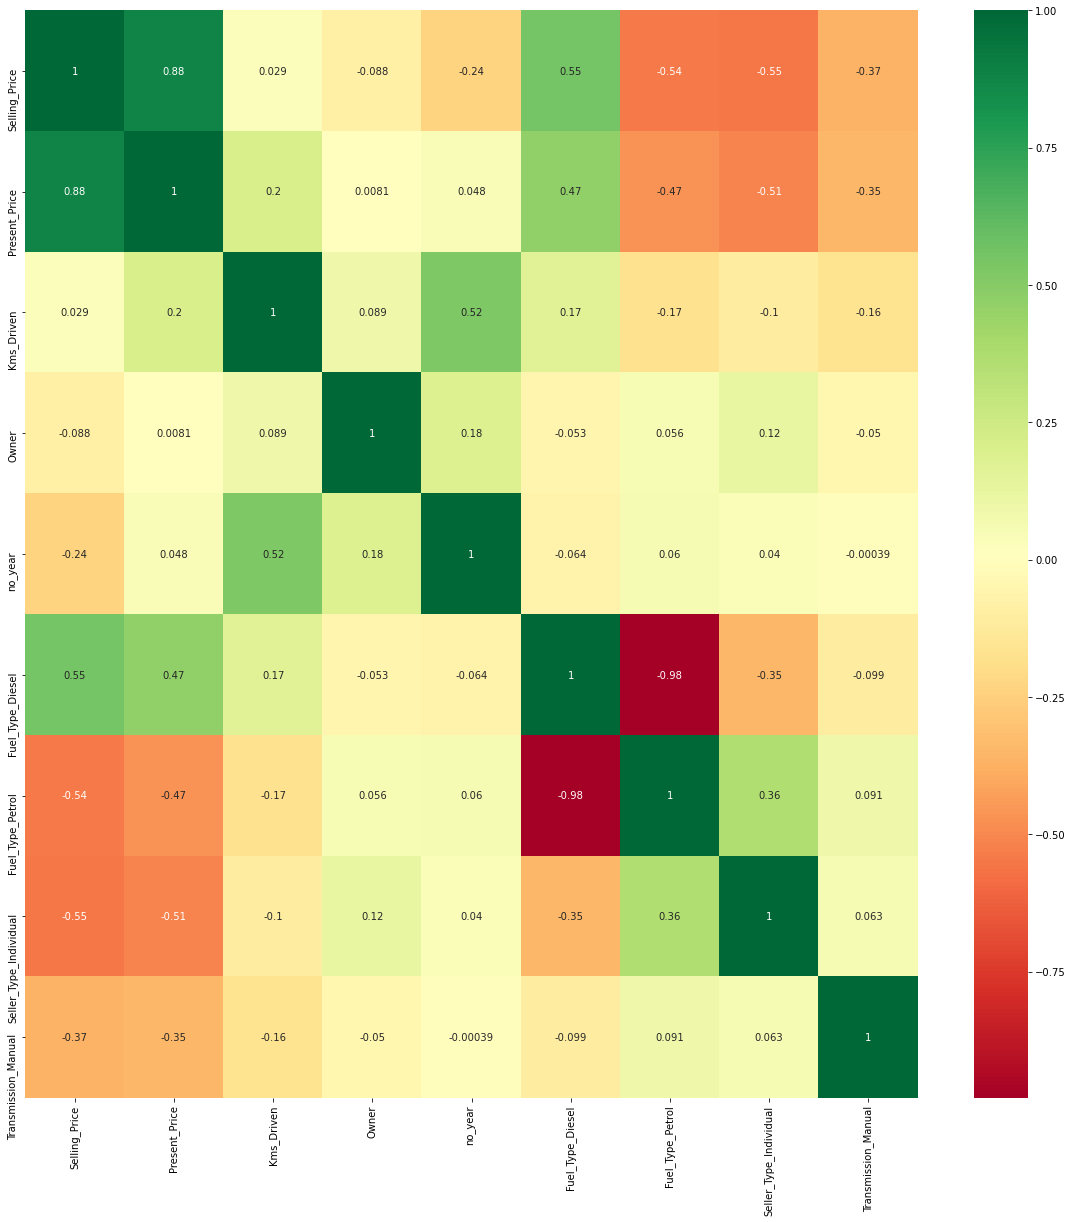

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
#here install matplotlib 
corrmat=final_dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [35]:
#Model building 
x=final_dataset.drop("Selling_Price",axis=1)
y=final_dataset["Selling_Price"]

In [38]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [39]:
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [40]:
print(model.feature_importances_)

[3.77792831e-01 4.22446851e-02 3.72007232e-04 7.63018746e-02
 2.19983282e-01 1.29485318e-02 1.33805756e-01 1.36551032e-01]


<function matplotlib.pyplot.show(close=None, block=None)>

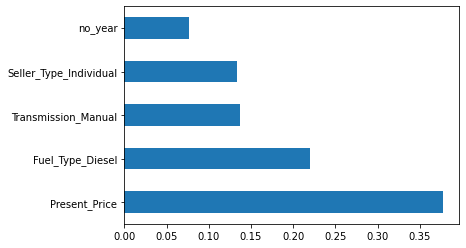

In [41]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show

In [43]:
rf_random=RandomForestRegressor()

In [45]:
#hyperparameter tuning
n_estimators=[int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [46]:
#Randomized search CV

#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

#Number of features to consider at every split
max_features = ['auto' , 'sqrt']

#maximum number of levels in tree

max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

#max_depth.append(None)
#Minimum number of samples required to split a node

min_samples_split = [2, 5, 10, 15, 100]

#minimum number of samples required at each leaf node

min_samples_leaf = [1, 2, 5, 10]

In [48]:
#from sklearn.model_selection import RandmizedSearchCV

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [49]:
rf = RandomForestRegressor()

In [50]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [51]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [52]:
predictions=rf_random.predict(x_test)

In [53]:
predictions

array([ 0.44238804,  0.59132341, 10.32798647,  3.05865811,  7.10401543,
        2.67487683,  1.04877208, 10.20704595,  4.44796579,  3.09118547,
        0.44350862,  7.90928611,  5.06822526,  5.74524885,  1.14438636,
        1.17469051,  1.30708809,  8.47546336,  6.47543847,  1.01967516,
        1.20015933,  5.02321524,  1.16225487,  0.61692709,  2.75910286,
        3.06755539, 20.61032695,  2.65668677,  0.64084722,  5.4520702 ,
       20.76078004,  1.22855881,  1.22068544,  4.72820274,  0.53351845,
        1.30308356,  0.35381906,  4.08962145,  0.44611105,  4.50549488,
        3.12120294,  2.55710766,  0.438015  ,  0.56686485,  6.22020641,
        9.481464  ,  4.0999726 , 10.38244936, 11.25921034,  5.69724632,
        4.25260775,  5.22225295,  8.03107223,  5.49959577,  4.63694421,
        2.80337918,  0.60758557,  3.03168215,  5.13337203,  7.38009326,
        5.44215016])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

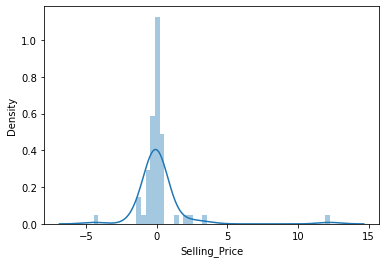

In [54]:
sns.distplot(y_test-predictions)